**ALP DATA MINING**

**Joyceline Andriany Suryanto - 0706022210025**

**Valencia Elcheiana - 0706022210036**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Preparation

This dataset contains sales transaction data from a retail store. This transaction data includes information about the products purchased, quantity, price, and date of purchase. The SuperStore Sales dataset is a useful dataset for customer behavior analysis. It can be used to learn what products are best sellers, what products are most frequently purchased by specific customers, and which customer segments are most profitable.


The dataset that we will use on this project is SuperStore Sales Dataset. **Below are the columns with the descriptions of each column:**

- Row ID+O6G3A1:R6 | String | ID unik setiap baris
- Order ID | Integer | ID pesanan
- Order Date | Date | Tanggal pembelian
- Ship Date | Date | Tanggal pengiriman
- Ship Mode | String | Metode pengiriman
- Customer ID | Integer | ID pelanggan
- Customer Name | String | Nama pelanggan
- Segment | String | Segmen pelanggan
- Address Country | String | Negara
- Adress City | String | Kota
- State | String | Negara bagian
- Region | String | Wilayah
- Product ID | Integer | ID produk
- Category | String | Kategori produk
- Sub-Category | String | Subkategori produk
- Product Name | String | Nama produk
- Price | Float | Harga produk
- Sales | Float | Total penjualan
- Quantity | Integer | Kuantitas produk yang dibeli
- Profit | Float | Keuntungan dari penjualan produk
- Returns | Integer | Jumlah produk yang dikembalikan
- Payment Mode | String | Metode pembayaran

 **Details column:**
- Kolom Row ID+O6G3A1:R6 merupakan kolom unik yang dapat digunakan untuk mengidentifikasi setiap baris dalam dataset.
- Kolom Order ID dan Customer ID merupakan kolom unik yang dapat digunakan untuk menghubungkan data dari dua file yang berbeda.
- Kolom Segment menunjukkan segmen pelanggan, yaitu:
   - Consumer: Konsumen perorangan
   - Corporate: Perusahaan
   - Home Office: Kantor rumah
- Kolom Country menunjukkan negara asal pelanggan.
- order_id, order_date, ship_date, ship_mode: Informasi terkait pesanan dan pengirimannya.
- customer_id, customer_name, segment: Informasi pelanggan.
- product_id, category, sub_category, product_name: Informasi produk.
- price, quantity, sales, cost, profit: Data transaksi.
- returns: Indikasi apakah produk dikembalikan.
- payment_mode: Metode pembayaran.
- year, month, day_name: Waktu transaksi.



In [ ]:
# load dataset and show the first ten sample
url = "https://raw.githubusercontent.com/JoycelineAS/DATASET_DATAMINING/main/SuperStore_Sales.csv"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


row_id+O6G3A1:R6        order_id  order_date   ship_date       ship_mode  \
0              4918  CA-2019-160304  2019-01-01  07-01-2019  Standard Class   
1              4919  CA-2019-160304  2019-02-01  07-01-2019  Standard Class   
2              4920  CA-2019-160304  2019-02-01  07-01-2019  Standard Class   
3              3074  CA-2019-125206  2019-03-01  05-01-2019     First Class   
4              8604  US-2019-116365  2019-03-01  08-01-2019  Standard Class   
5              8605  US-2019-116365  2019-03-01  08-01-2019  Standard Class   
6              8606  US-2019-116365  2019-03-01  08-01-2019  Standard Class   
7              9494  CA-2019-105207  2019-03-01  08-01-2019  Standard Class   
8              9495  CA-2019-105207  2019-03-01  08-01-2019  Standard Class   
9              2898  US-2019-164630  2019-04-01  09-01-2019  Standard Class   

  customer_id      customer_name    segment        country  address_city  \
0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg   
1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg   
2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg   
3    LR-16915       Lena Radford   Consumer  United States   Los Angeles   
4    CA-12310  Christine Abelman  Corporate  United States   San Antonio   
5    CA-12310  Christine Abelman  Corporate  United States   San Antonio   
6    CA-12310  Christine Abelman  Corporate  United States   San Antonio   
7    BO-11350      Bill Overfelt  Corporate  United States  Broken Arrow   
8    BO-11350      Bill Overfelt  Corporate  United States  Broken Arrow   
9    EB-13975         Erica Bern  Corporate  United States     Charlotte   

    address_state   region       product_id         category sub_category  \
0        Maryland     East  FUR-BO-10004709        Furniture    Bookcases   
1        Maryland     East  FUR-BO-10004709        Furniture    Bookcases   
2        Maryland     East  TEC-PH-10000455       Technology       Phones   
3      California     West  OFF-ST-10003692  Office Supplies      Storage   
4           Texas  Central  TEC-AC-10002217       Technology  Accessories   
5           Texas  Central  TEC-AC-10002942       Technology  Accessories   
6           Texas  Central  TEC-PH-10002890       Technology       Phones   
7        Oklahoma  Central  FUR-TA-10000617        Furniture       Tables   
8        Oklahoma  Central  OFF-BI-10004364  Office Supplies      Binders   
9  North Carolina    South  TEC-CO-10000971       Technology      Copiers   

                                                            product_name  \
0              Bush Westfield Collection Bookcases, Medium Cherry Finish   
1              Bush Westfield Collection Bookcases, Medium Cherry Finish   
2                                                            GE 30522EE2   
3                  Recycled Steel Personal File for Hanging File Folders   
4                                    Imation Clip USB flash drive - 8 GB   
5                  WD My Passport Ultra 1TB Portable External Hard Drive   
6                                          AT&T 17929 Lendline Telephone   
7  Hon Practical Foundations 30 x 60 Training Table, Light Gray/Charcoal   
8                                                Storex Dura Pro Binders   
9                               Hewlett Packard 310 Color Digital Copier   

     price  quantity     sales       cost    profit  returns payment_mode  \
0   73.940         1    73.940    45.6732   28.2668    False       Online   
1   57.980         3   173.940   135.6732   38.2668    False       Online   
2  115.990         2   231.980   164.7058   67.2742    False        Cards   
3   57.230         2   114.460    85.8450   28.6150    False       Online   
4   15.040         2    30.080    35.3440   -5.2640    False       Online   
5   55.200         3   165.600   171.8100   -6.2100    False       Online   
6   36.192         5   180.960   167.3880   13.5720    False        Card

In [ ]:
# Convert date columns to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Validate that dates are correctly parsed
invalid_order_dates = df['order_date'].isna().sum()
invalid_ship_dates = df['ship_date'].isna().sum()
if invalid_order_dates > 0 or invalid_ship_dates > 0:
    print(f"Warning: {invalid_order_dates} invalid order dates and {invalid_ship_dates} invalid ship dates detected.")

# Ensure numeric columns are properly formatted
numeric_columns = ['price', 'quantity', 'sales', 'cost', 'profit']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle any potential invalid numeric data
invalid_numeric = df[numeric_columns].isna().sum()
if invalid_numeric.any():
    print("Invalid numeric values found in:")
    print(invalid_numeric)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Handle outliers in numeric columns using IQR method
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Display a summary of the cleaned dataset
print("Cleaned dataset summary:")
print(df.info())

Cleaned dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id+O6G3A1:R6  3939 non-null   int64         
 1   order_id          3939 non-null   object        
 2   order_date        3939 non-null   datetime64[ns]
 3   ship_date         1583 non-null   datetime64[ns]
 4   ship_mode         3939 non-null   object        
 5   customer_id       3939 non-null   object        
 6   customer_name     3939 non-null   object        
 7   segment           3939 non-null   object        
 8   country           3939 non-null   object        
 9   address_city      3939 non-null   object        
 10  address_state     3939 non-null   object        
 11  region            3939 non-null   object        
 12  product_id        3939 non-null   object        
 13  category          3939 non-null   object        
 14 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check if there are any missing values in the data.

In [ ]:
# Check for null values in the dataset
missing_values = df.isnull().sum()
missing_values

# As shown, mostly there are no missing values on the columns. However, there are 2356 missing values on ship_date columns.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


row_id+O6G3A1:R6       0
order_id               0
order_date             0
ship_date           2356
ship_mode              0
customer_id            0
customer_name          0
segment                0
country                0
address_city           0
address_state          0
region                 0
product_id             0
category               0
sub_category           0
product_name           0
price                  0
quantity               0
sales                  0
cost                   0
profit                 0
returns                0
payment_mode           0
year                   0
month                  0
day_name               0
dtype: int64

# Data Cleaning

In [ ]:
# Fill the missing values
df['ship_date'].fillna(df['order_date'], inplace=True)
print(df['ship_date'].isna().sum())

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-f5b17fb8457a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship_date'].fillna(df['order_date'], inplace=True)


Drop the unnecessary column

In [ ]:
# Drop non-relevant columns
columns_to_drop = ['row_id+O6G3A1:R6', 'customer_id', 'product_id']
df = df.drop(columns=columns_to_drop)

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_date  ship_date       ship_mode      customer_name  \
0  CA-2019-160304 2019-01-01 2019-07-01  Standard Class      Brendan Murry   
1  CA-2019-160304 2019-02-01 2019-07-01  Standard Class      Brendan Murry   
2  CA-2019-125206 2019-03-01 2019-05-01     First Class       Lena Radford   
3  US-2019-116365 2019-03-01 2019-08-01  Standard Class  Christine Abelman   
4  US-2019-116365 2019-03-01 2019-08-01  Standard Class  Christine Abelman   

     segment        country  address_city address_state   region  \
0  Corporate  United States  Gaithersburg      Maryland     East   
1  Corporate  United States  Gaithersburg      Maryland     East   
2   Consumer  United States   Los Angeles    California     West   
3  Corporate  United States   San Antonio         Texas  Central   
4  Corporate  United States   San Antonio         Texas  Central   

          category sub_category  \
0        Furniture    Bookcases   
1        Furniture    Bookcases   
2  Office Supplies      Storage   
3       Technology  Accessories   
4       Technology  Accessories   

                                                product_name  price  quantity  \
0  Bush Westfield Collection Bookcases, Medium Cherry Finish  73.94         1   
1  Bush Westfield Collection Bookcases, Medium Cherry Finish  57.98         3   
2      Recycled Steel Personal File for Hanging File Folders  57.23         2   
3                        Imation Clip USB flash drive - 8 GB  15.04         2   
4      WD My Passport Ultra 1TB Portable External Hard Drive  55.20         3   

    sales      cost   profit  returns payment_mode  year  month day_name  
0   73.94   45.6732  28.2668    False       Online  2019      1  Tuesday  
1  173.94  135.6732  38.2668    False       Online  2019      2   Friday  
2  114.46   85.8450  28.6150    False       Online  2019      3   Friday  
3   30.08   35.3440  -5.2640    False       Online  2019      3   Friday  
4  165.60  171.8100  -6.2100    False       Online  2019      3   Friday

# Exploratory Data Analysis (EDA)

In [ ]:
# describe data
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_date                      ship_date  \
count                           3939                           3939   
mean   2020-01-26 05:10:00.456968960  2020-02-10 20:14:48.347296256   
min              2019-01-01 00:00:00            2019-01-02 00:00:00   
25%              2019-08-11 12:00:00            2019-09-03 00:00:00   
50%              2020-02-01 00:00:00            2020-02-07 00:00:00   
75%              2020-07-29 00:00:00            2020-08-18 00:00:00   
max              2020-12-30 00:00:00            2021-04-01 00:00:00   
std                              NaN                            NaN   

             price     quantity        sales         cost       profit  \
count  3939.000000  3939.000000  3939.000000  3939.000000  3939.000000   
mean     37.954359     3.388423    96.458141    87.459754     8.998387   
min       0.336000     1.000000     0.836000     0.840000   -23.937200   
25%       9.773000     2.000000    32.668000    23.985700     2.262100   
50%      28.534000     3.000000   104.920000    96.379900     6.553800   
75%      52.792000     4.000000   134.128000   125.213800    15.132900   
max     195.184000     9.000000   339.960000   301.462500    45.487000   
std      35.599688     1.911827    66.202417    63.910299    12.177651   

              year        month  
count  3939.000000  3939.000000  
mean   2019.539731     6.874841  
min    2019.000000     1.000000  
25%    2019.000000     4.000000  
50%    2020.000000     7.000000  
75%    2020.000000    10.000000  
max    2020.000000    12.000000  
std       0.498482     3.387805

Showing the columns information including datatype of each column

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3939 non-null   object        
 1   order_date     3939 non-null   datetime64[ns]
 2   ship_date      3939 non-null   datetime64[ns]
 3   ship_mode      3939 non-null   object        
 4   customer_name  3939 non-null   object        
 5   segment        3939 non-null   object        
 6   country        3939 non-null   object        
 7   address_city   3939 non-null   object        
 8   address_state  3939 non-null   object        
 9   region         3939 non-null   object        
 10  category       3939 non-null   object        
 11  sub_category   3939 non-null   object        
 12  product_name   3939 non-null   object        
 13  price          3939 non-null   float64       
 14  quantity       3939 non-null   int64         
 15  sales          3939 n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Make sure if all missing values are filled

In [ ]:
missing_values = df.isnull().sum()
missing_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_name    0
segment          0
country          0
address_city     0
address_state    0
region           0
category         0
sub_category     0
product_name     0
price            0
quantity         0
sales            0
cost             0
profit           0
returns          0
payment_mode     0
year             0
month            0
day_name         0
dtype: int64

**Data Visualization**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


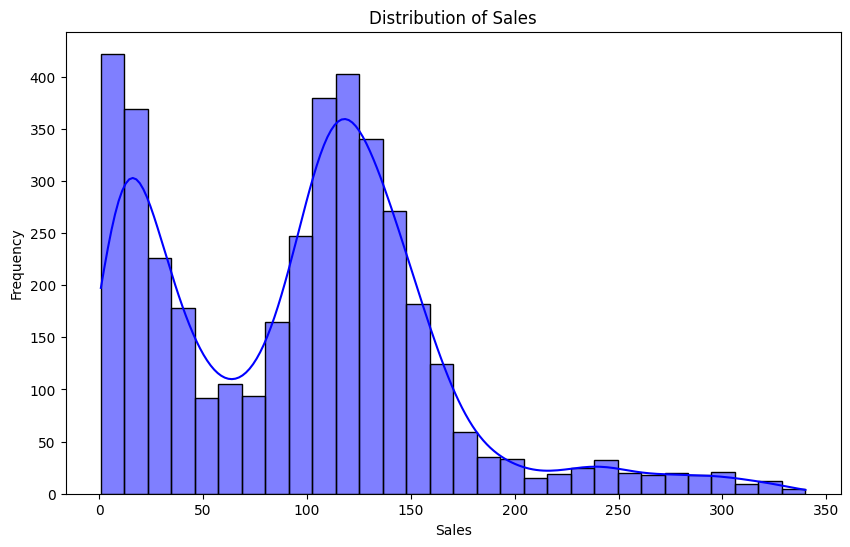

In [ ]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-d0a4e28a5847>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='profit', data=df, palette='Set2')


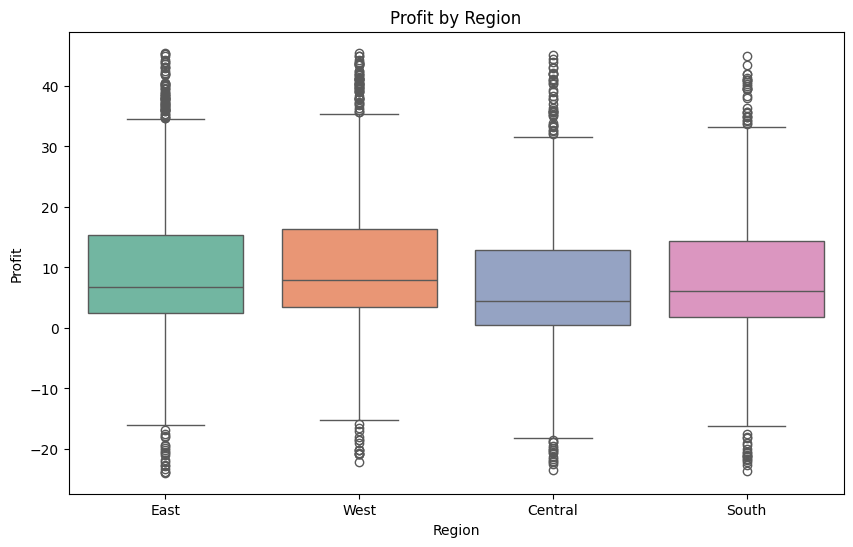

In [ ]:
# Boxplot of Profit by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='profit', data=df, palette='Set2')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


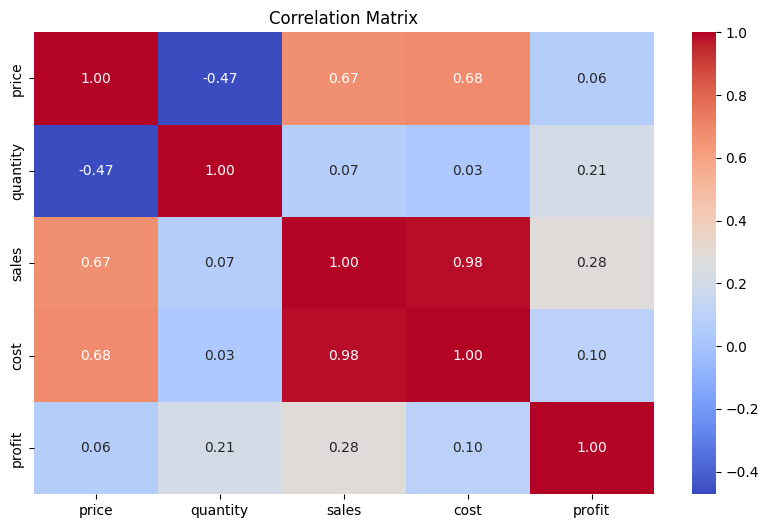

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


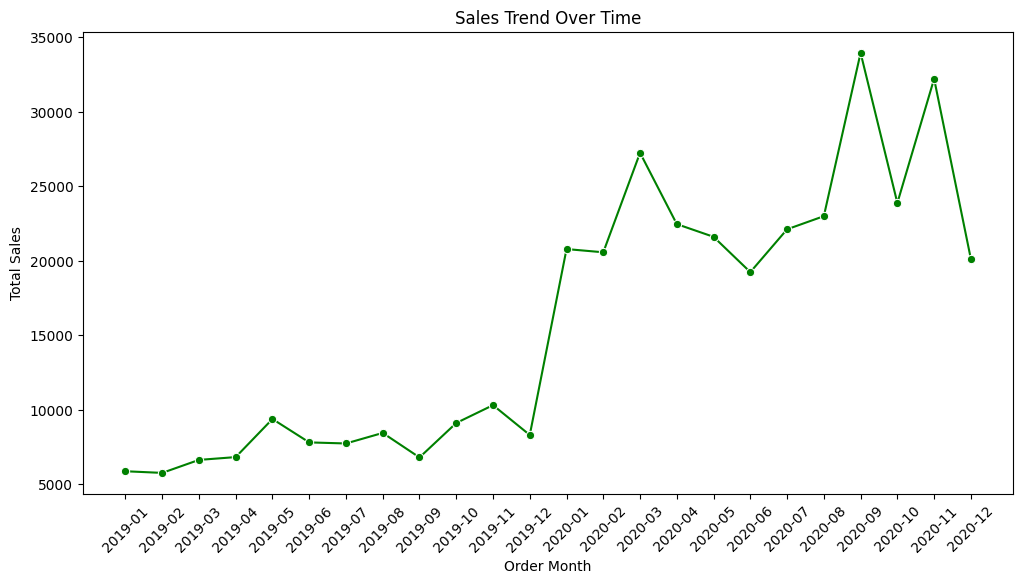

In [ ]:
# Sales Trend Over Time
df['order_month'] = df['order_date'].dt.to_period('M')
sales_trend = df.groupby('order_month')['sales'].sum().reset_index()
sales_trend['order_month'] = sales_trend['order_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='sales', data=sales_trend, marker='o', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


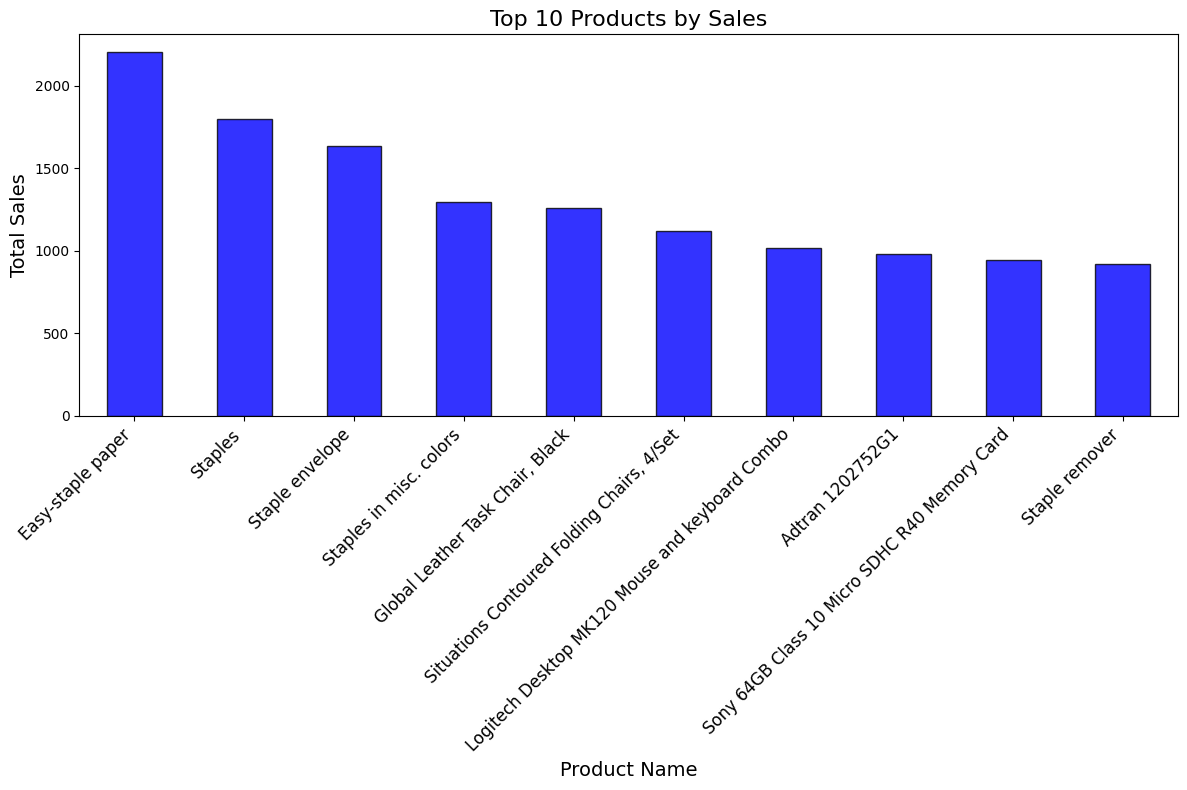

In [ ]:
# Top 10 Products by Sales
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = top_products.plot(kind='bar', color='blue', alpha=0.8, edgecolor='black')

plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


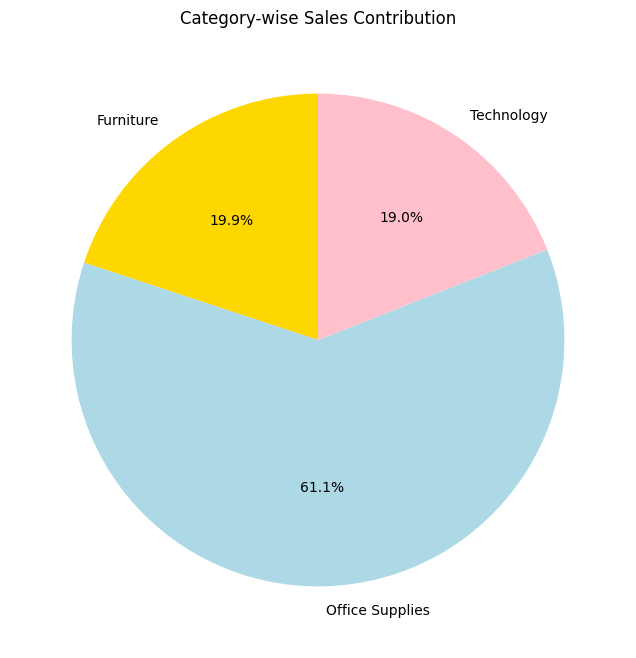

In [ ]:
# Category-wise Sales Contribution
category_sales = df.groupby('category')['sales'].sum()
plt.figure(figsize=(8, 8))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'pink'])
plt.title('Category-wise Sales Contribution')
plt.ylabel('')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


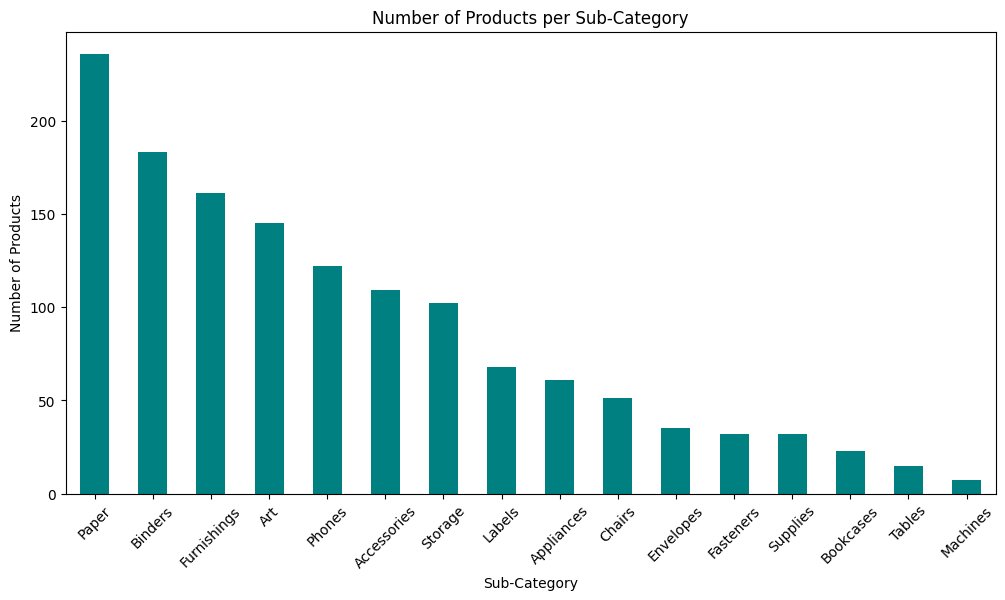

In [ ]:
# Number of Products per Sub-Category
product_count = df.groupby('sub_category')['product_name'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
product_count.plot(kind='bar', color='teal')
plt.title('Number of Products per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


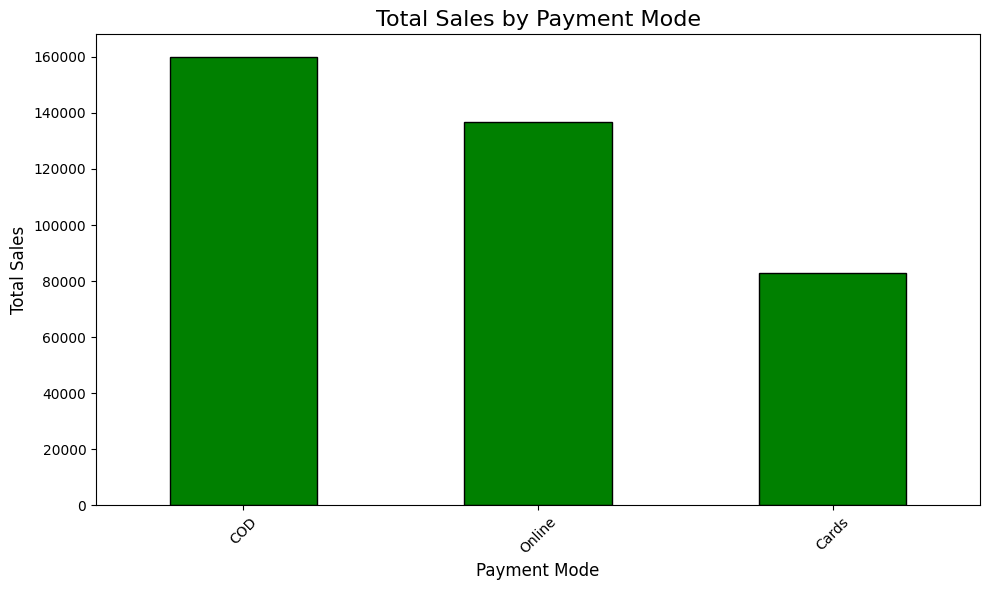

In [ ]:
# Total sales by payment mode
payment_mode_sales = df.groupby('payment_mode')['sales'].sum().sort_values(ascending=False)

# Bar chart for total sales by payment mode
plt.figure(figsize=(10, 6))
payment_mode_sales.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Sales by Payment Mode', fontsize=16)
plt.xlabel('Payment Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Transformation

Perform label encoding

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns to encode
categorical_cols = ['ship_mode', 'segment', 'region', 'category', 'sub_category','returns', 'payment_mode', 'day_name']

# Iterate through the specified categorical columns and apply label encoding
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_date  ship_date  ship_mode      customer_name  \
0  CA-2019-160304 2019-01-01 2019-07-01          3      Brendan Murry   
1  CA-2019-160304 2019-02-01 2019-07-01          3      Brendan Murry   
2  CA-2019-125206 2019-03-01 2019-05-01          0       Lena Radford   
3  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   
4  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   

   segment        country  address_city address_state  region  category  \
0        1  United States  Gaithersburg      Maryland       1         0   
1        1  United States  Gaithersburg      Maryland       1         0   
2        0  United States   Los Angeles    California       3         1   
3        1  United States   San Antonio         Texas       0         2   
4        1  United States   San Antonio         Texas       0         2   

   sub_category                                               product_name  \
0             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
1             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
2            13      Recycled Steel Personal File for Hanging File Folders   
3             0                        Imation Clip USB flash drive - 8 GB   
4             0      WD My Passport Ultra 1TB Portable External Hard Drive   

   price  quantity   sales      cost   profit  returns  payment_mode  year  \
0  73.94         1   73.94   45.6732  28.2668        0             2  2019   
1  57.98         3  173.94  135.6732  38.2668        0             2  2019   
2  57.23         2  114.46   85.8450  28.6150        0             2  2019   
3  15.04         2   30.08   35.3440  -5.2640        0             2  2019   
4  55.20         3  165.60  171.8100  -6.2100        0             2  2019   

   month  day_name order_month  
0      1         5     2019-01  
1      2         0     2019-02  
2      3         0     2019-03  
3      3         0     2019-03  
4      3         0     2019-03

Check the datatype of each column after encoding the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3939 non-null   object        
 1   order_date     3939 non-null   datetime64[ns]
 2   ship_date      3939 non-null   datetime64[ns]
 3   ship_mode      3939 non-null   int64         
 4   customer_name  3939 non-null   object        
 5   segment        3939 non-null   int64         
 6   country        3939 non-null   object        
 7   address_city   3939 non-null   object        
 8   address_state  3939 non-null   object        
 9   region         3939 non-null   int64         
 10  category       3939 non-null   int64         
 11  sub_category   3939 non-null   int64         
 12  product_name   3939 non-null   object        
 13  price          3939 non-null   float64       
 14  quantity       3939 non-null   int64         
 15  sales          3939 n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
columns_to_convert = ['price', 'sales', 'cost', 'profit']

for column in columns_to_convert:
    if column in df.columns:
        # Convert float to integer, handling potential errors
        try:
            df[column] = df[column].astype(int)
        except ValueError as e:
            print(f"Error converting '{column}' to integer: {e}")
            # Handle the error appropriately (e.g., fill NaN values, drop rows)
            # Example: Filling NaN values with 0
            df[column] = df[column].fillna(0).astype(int)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3939 non-null   object        
 1   order_date     3939 non-null   datetime64[ns]
 2   ship_date      3939 non-null   datetime64[ns]
 3   ship_mode      3939 non-null   int64         
 4   customer_name  3939 non-null   object        
 5   segment        3939 non-null   int64         
 6   country        3939 non-null   object        
 7   address_city   3939 non-null   object        
 8   address_state  3939 non-null   object        
 9   region         3939 non-null   int64         
 10  category       3939 non-null   int64         
 11  sub_category   3939 non-null   int64         
 12  product_name   3939 non-null   object        
 13  price          3939 non-null   int64         
 14  quantity       3939 non-null   int64         
 15  sales          3939 n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apply feature scaling to the data

In [ ]:
# Scaling data
scaler = StandardScaler()

# Select only numeric columns to scale
numeric_cols = df.select_dtypes(include=['int64']).columns

# Apply Standard Scaling and create a new DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Display the first 5 rows of the scaled DataFrame
df_scaled.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ship_mode   segment    region  category  sub_category     price  quantity  \
0   0.714814  0.413904 -0.511571 -1.795198     -0.635079  1.000893 -1.249447   
1   0.714814  0.413904 -0.511571 -1.795198     -0.635079  0.551119 -0.203195   
2  -1.963358 -0.873906  1.208513  0.020746      1.386850  0.551119 -0.726321   
3   0.714814  0.413904 -1.371613  1.836690     -1.533714 -0.629536 -0.726321   
4   0.714814  0.413904 -1.371613  1.836690     -1.533714  0.494898 -0.203195   

      sales      cost    profit   returns  payment_mode      year     month  \
0 -0.345775 -0.656287  1.618122 -0.225123      1.188524 -1.082886 -1.734335   
1  1.165266  0.752018  2.453545 -0.225123      1.188524 -1.082886 -1.439121   
2  0.273752 -0.030374  1.618122 -0.225123      1.188524 -1.082886 -1.143907   
3 -0.995522 -0.812766 -1.138776 -0.225123      1.188524 -1.082886 -1.143907   
4  1.044382  1.315339 -1.222319 -0.225123      1.188524 -1.082886 -1.143907   

   day_name  
0  0.910631  
1 -1.534812  
2 -1.534812  
3 -1.534812  
4 -1.534812

## K-Means Clustering

1. Using elbow method

In this case study, determine the number of clusters to be formed. Below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


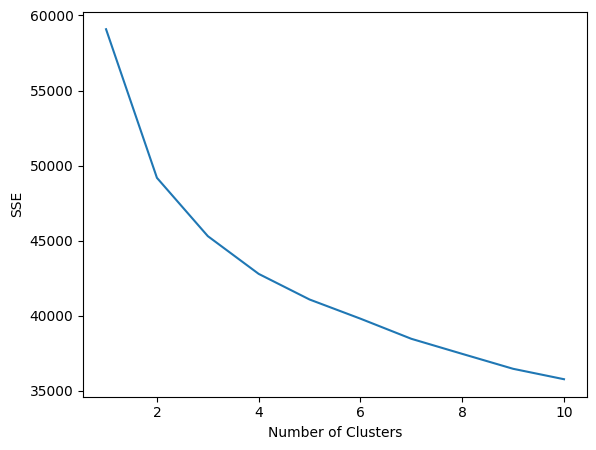

In [ ]:
# Initialize a list to store the WCSS values
wcss = []

# Compute KMeans for k values in range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6.5, 5))
plt.plot(range(1, 11), wcss, linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# To find the best clusters for the model
kneedle = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
best_k = kneedle.elbow

print(f"The best k for you model is {best_k}")

The best k for you model is 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
# Apply K-Means with the best number of clusters (based on the result above = 3)
kmeans = KMeans(n_clusters = best_k, init='random', max_iter = 300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

### K-Means Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


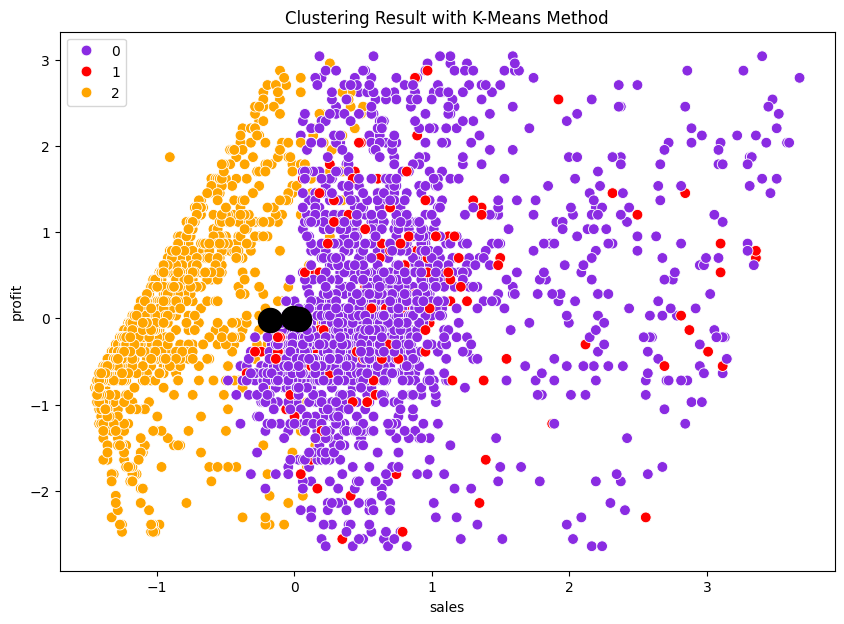

In [ ]:
# visualize the result using scatter chart
plt.figure(figsize = (10, 7))

sns.scatterplot(x = "sales", y = "profit", hue = y_pred, palette = ["blueviolet", "red", "orange"],
                data = df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "black")
plt.xlabel('sales')
plt.ylabel('profit')
plt.title('Clustering Result with K-Means Method')
plt.show()

Inverse transform the scaled data to get the original values

In [ ]:
df_scaled= pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df['KMeans'] = y_pred

df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_date  ship_date  ship_mode      customer_name  \
0  CA-2019-160304 2019-01-01 2019-07-01          3      Brendan Murry   
1  CA-2019-160304 2019-02-01 2019-07-01          3      Brendan Murry   
2  CA-2019-125206 2019-03-01 2019-05-01          0       Lena Radford   
3  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   
4  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   

   segment        country  address_city address_state  region  category  \
0        1  United States  Gaithersburg      Maryland       1         0   
1        1  United States  Gaithersburg      Maryland       1         0   
2        0  United States   Los Angeles    California       3         1   
3        1  United States   San Antonio         Texas       0         2   
4        1  United States   San Antonio         Texas       0         2   

   sub_category                                               product_name  \
0             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
1             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
2            13      Recycled Steel Personal File for Hanging File Folders   
3             0                        Imation Clip USB flash drive - 8 GB   
4             0      WD My Passport Ultra 1TB Portable External Hard Drive   

   price  quantity  sales  cost  profit  returns  payment_mode  year  month  \
0     73         1     73    45      28        0             2  2019      1   
1     57         3    173   135      38        0             2  2019      2   
2     57         2    114    85      28        0             2  2019      3   
3     15         2     30    35      -5        0             2  2019      3   
4     55         3    165   171      -6        0             2  2019      3   

   day_name order_month  KMeans  
0         5     2019-01       2  
1         0     2019-02       0  
2         0     2019-03       0  
3         0     2019-03       2  
4         0     2019-03       0

Display the cluster summary

In [ ]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('KMeans').agg({
    'ship_mode': [pd.Series.mode, 'min', 'max'],
    'segment': [pd.Series.mode],
    'region': [pd.Series.mode],
    'category': [pd.Series.mode],
    'sub_category': [pd.Series.mode],
    'price': ['mean', 'std', 'min', 'max'],
    'quantity': ['mean', 'std', 'min', 'max'],
    'sales': ['mean', 'std', 'min', 'max'],
    'cost': ['mean', 'std', 'min', 'max'],
    'profit': ['mean', 'std', 'min', 'max'],
    'returns': [pd.Series.mode],
    'payment_mode': [pd.Series.mode],
    'year': [pd.Series.mode],
    'month': [pd.Series.mode],
    'day_name': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("Cluster")
transpose_cluster_summary = cluster_summary.T

new_columns = [f"Cluster {col}" for col in transpose_cluster_summary.columns]
transpose_cluster_summary.columns = pd.Index(new_columns, name="KMeans")

# Show all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

transpose_cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans               Cluster 0    Cluster 1    Cluster 2
ship_mode    mode     3.000000     3.000000     3.000000
             min      0.000000     0.000000     0.000000
             max      3.000000     3.000000     3.000000
segment      mode     0.000000     0.000000     0.000000
region       mode     3.000000     3.000000     3.000000
category     mode     1.000000     1.000000     1.000000
sub_category mode    11.000000     3.000000     3.000000
price        mean    55.369677    57.042105    11.250000
             std     34.927506    38.368422    12.077863
             min     11.000000    10.000000     0.000000
             max    195.000000   187.000000    83.000000
quantity     mean     3.350491     3.378947     3.439826
             std      1.876636     1.922735     1.956251
             min      1.000000     1.000000     1.000000
             max      9.000000     9.000000     9.000000
sales        mean   139.257838   141.868421    32.962159
             std     46.939513    48.986863    28.272206
             min     64.000000    73.000000     0.000000
             max    339.000000   318.000000   140.000000
cost         mean   129.758540   132.447368    24.815136
             std     44.618175    48.185212    23.144258
             min     63.000000    71.000000     0.000000
             max    301.000000   301.000000   130.000000
profit       mean     9.203088     9.100000     7.817618
             std     12.751402    11.312095    10.890755
             min    -23.000000   -22.000000   -21.000000
             max     45.000000    43.000000    44.000000
returns      mode     0.000000     1.000000     0.000000
payment_mode mode     0.000000     2.000000     0.000000
year         mode  2020.000000  2020.000000  2019.000000
month        mode     9.000000     9.000000    11.000000
day_name     mode     4.000000     1.000000     4.000000

Check the number of values in KMeans column

In [ ]:
df['KMeans'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans
0    2137
1     190
2    1612
Name: count, dtype: int64

Interpretation of K-Means Clusters

In [ ]:
# Cluster 0 represents the largest group, who exhibit moderate spending behavior, with an average sales value of 139.26 and a profit of 30.96. These customers purchase modest quantities of products (mean quantity of 3.35) and have balanced preferences across different categories and sub-categories. They primarily use a specific shipping method (mode = 3), indicating a consistent logistic preference. Marketing efforts for this cluster should focus on moderately priced products, loyalty programs, and campaigns that highlight frequently purchased items and provide shipping incentives to maintain engagement and drive sales.
# Cluster 1 is the smallest group, who are budget-conscious and exhibit the lowest spending and profitability, with mean sales of 47.88 and a profit of 11.69. They tend to purchase smaller quantities (mean quantity of 3.01) and likely focus on budget-friendly items within various sub-categories. While this cluster is less profitable, it can be engaged through promotions, heavy discounts, and value-based marketing strategies to encourage higher spending and repeat purchases. Targeting this segment with time-limited deals and cost-effective bundles may help maximize its potential.
# Cluster 2 who represent a highly profitable segment with the highest average sales (258.32) and profit (62.69). These customers tend to purchase in slightly larger quantities (mean quantity of 3.43) and are likely drawn to premium or mid-range products. They show a strong preference for a specific shipping method (mode = 3), suggesting a demand for convenience and efficiency. Marketing strategies for this cluster should emphasize premium product offerings, personalized campaigns promoting high-value items, and expedited shipping options to cater to their preferences and maintain their loyalty.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Daftar linkage methods
linkage_methods = ['ward', 'single', 'complete', 'average']
silhouette_scores = {}

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=8, linkage=method)
    hc_labels = hc.fit_predict(df_scaled)
    hc_silhouette = silhouette_score(df_scaled, hc_labels)
    silhouette_scores[method] = hc_silhouette
    print(f"Silhouette Score Hierarchical Clustering ({method}): {hc_silhouette}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score Hierarchical Clustering (ward): 0.3820550320045863
Silhouette Score Hierarchical Clustering (single): 0.26355566448598283
Silhouette Score Hierarchical Clustering (complete): 0.3860237663765953
Silhouette Score Hierarchical Clustering (average): 0.49209463740700093


Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [ ]:
# agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_predA = agglomerative.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df['Agglo'] = y_predA

# show the df
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_date  ship_date  ship_mode      customer_name  \
0  CA-2019-160304 2019-01-01 2019-07-01          3      Brendan Murry   
1  CA-2019-160304 2019-02-01 2019-07-01          3      Brendan Murry   
2  CA-2019-125206 2019-03-01 2019-05-01          0       Lena Radford   
3  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   
4  US-2019-116365 2019-03-01 2019-08-01          3  Christine Abelman   

   segment        country  address_city address_state  region  category  \
0        1  United States  Gaithersburg      Maryland       1         0   
1        1  United States  Gaithersburg      Maryland       1         0   
2        0  United States   Los Angeles    California       3         1   
3        1  United States   San Antonio         Texas       0         2   
4        1  United States   San Antonio         Texas       0         2   

   sub_category                                               product_name  \
0             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
1             4  Bush Westfield Collection Bookcases, Medium Cherry Finish   
2            13      Recycled Steel Personal File for Hanging File Folders   
3             0                        Imation Clip USB flash drive - 8 GB   
4             0      WD My Passport Ultra 1TB Portable External Hard Drive   

   price  quantity  sales  cost  profit  returns  payment_mode  year  month  \
0     73         1     73    45      28        0             2  2019      1   
1     57         3    173   135      38        0             2  2019      2   
2     57         2    114    85      28        0             2  2019      3   
3     15         2     30    35      -5        0             2  2019      3   
4     55         3    165   171      -6        0             2  2019      3   

   day_name order_month  KMeans  Agglo  
0         5     2019-01       2      1  
1         0     2019-02       0      0  
2         0     2019-03       0      0  
3         0     2019-03       2      1  
4         0     2019-03       0      0

Display the cluster summary in the form of a dataframe.

In [ ]:
cluster_summary = df.groupby(y_predA).agg({
   'ship_mode': [pd.Series.mode, 'min', 'max'],
    'segment': [pd.Series.mode],
    'region': [pd.Series.mode],
    'category': [pd.Series.mode],
    'sub_category': [pd.Series.mode],
    'price': ['mean', 'std', 'min', 'max'],
    'quantity': ['mean', 'std', 'min', 'max'],
    'sales': ['mean', 'std', 'min', 'max'],
    'cost': ['mean', 'std', 'min', 'max'],
    'profit': ['mean', 'std', 'min', 'max'],
    'returns': [pd.Series.mode],
    'payment_mode': [pd.Series.mode],
    'year': [pd.Series.mode],
    'month': [pd.Series.mode],
    'day_name': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("Agglo")
cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ship_mode         segment region category sub_category      price  \
           mode min max    mode   mode     mode         mode       mean   
Agglo                                                                     
0             3   0   3       0      3        1           11  51.093905   
1             3   0   3       0      3        1            3  10.115283   
2             3   0   3       0      3        0            5  91.116505   

                           quantity                         sales             \
             std min  max      mean       std min max        mean        std   
Agglo                                                                          
0      33.007640  10  195  3.385553  1.918711   1   9  126.405869  25.702331   
1      11.161629   0   83  3.396574  1.954874   1   9   28.500000  22.455075   
2      34.477791  31  167  3.359223  1.474031   2   9  264.233010  33.484675   

                       cost                          profit                 \
       min  max        mean        std  min  max       mean        std min   
Agglo                                                                        
0       71  217  117.162980  25.102339   59  218   8.942664  12.631239 -23   
1        0   99   20.890646  17.039909    0   80   7.277339  10.017988 -21   
2      209  339  248.703883  32.419426  183  301  15.257282  15.117969 -23   

          returns payment_mode  year month day_name  
      max    mode         mode  mode  mode     mode  
Agglo                                                
0      45       0            0  2020     9        4  
1      43       0            0  2019    11        4  
2      45       0            0  2020    12        1

In [ ]:
agglo_counts = df['Agglo'].value_counts().sort_index()
agglo_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Agglo
0    2215
1    1518
2     206
Name: count, dtype: int64

Interpretation of Agglomerative Clustering

In [ ]:
# Cluster 0 represents high-volume customers with low-profit margins, characterized by large purchase quantities but relatively low sales and profit.
# Cluster 1 includes small-scale buyers with the lowest profitability, as they make low-quantity purchases that contribute minimally to overall sales and profit.
# Cluster 2 consists of high-value customers who generate significant profits despite low purchase quantities, as they tend to buy high-value items.

# Strategically, businesses should focus on cost optimization for Cluster 0, implement upselling or cross-selling strategies to increase purchase volumes in Cluster 1, and prioritize retention and growth strategies for Cluster 2, given their high profitability.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Hierarchical Visualization

Single Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


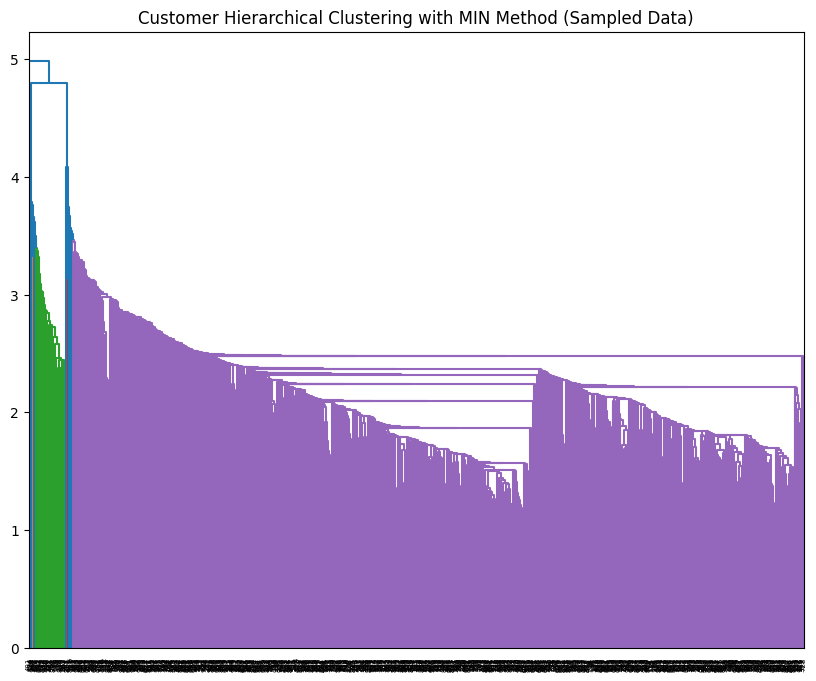

In [ ]:
# Sampling subset data
sampled_data = df_scaled.sample(n=1000, random_state=42)

# Generate dendrogram
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MIN Method (Sampled Data)")
dend = sch.dendrogram(sch.linkage(sampled_data, method='single'))
plt.show()

Complete linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


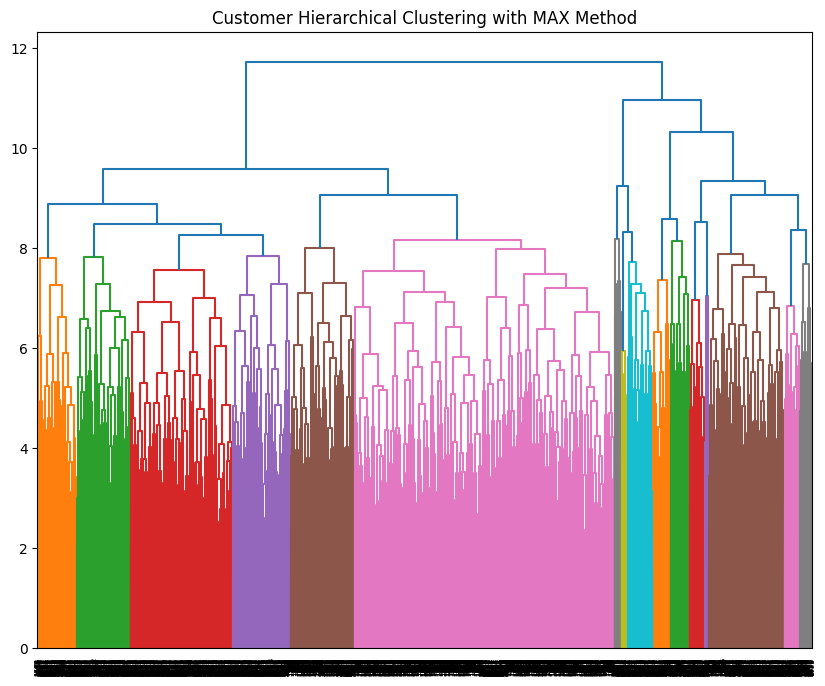

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MAX Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

Average Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


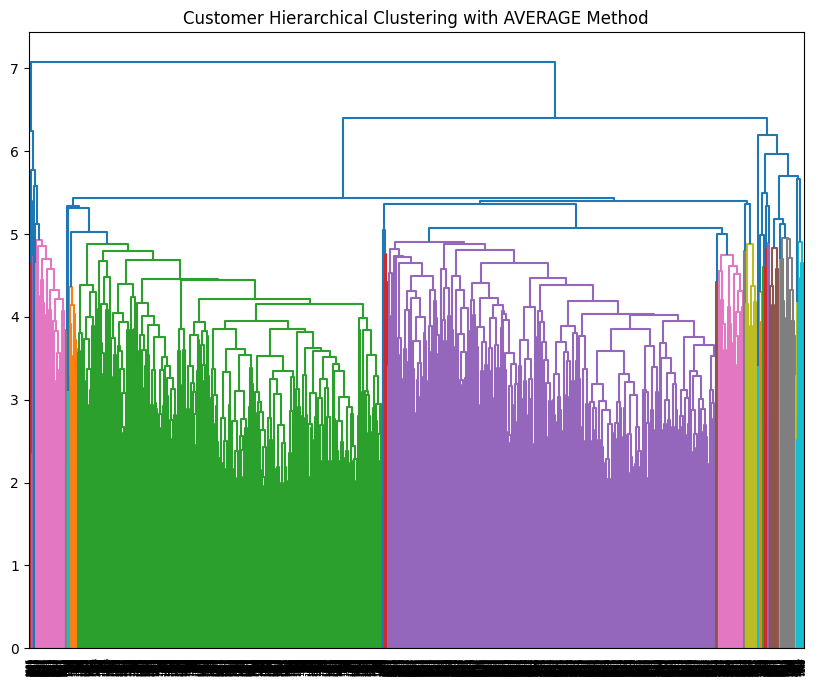

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

Ward Method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


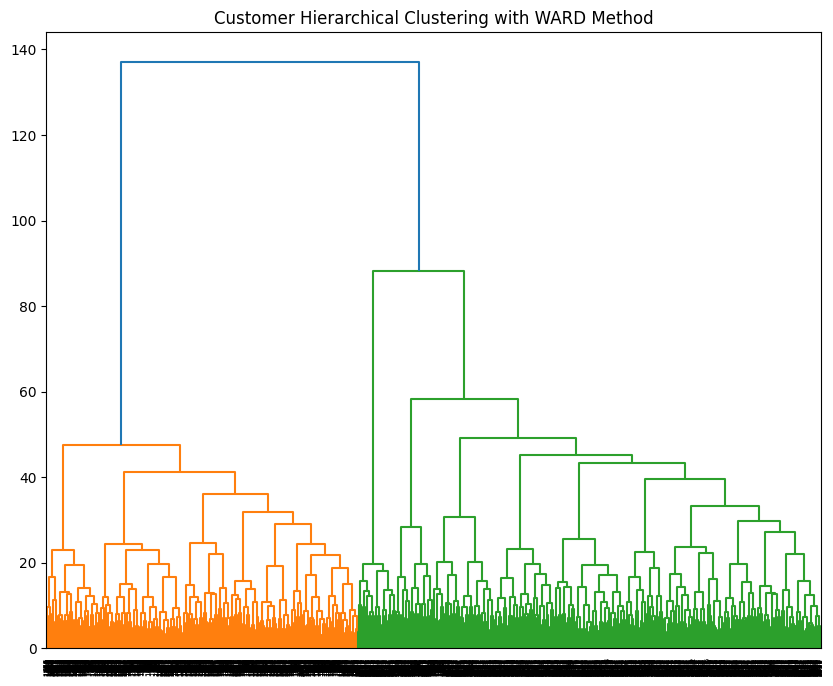

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()

**Conclusion**

From the results of both methods, both are suitable for use. However, K-Means is more appropriate if the goal is quick and directly actionable customer segmentation (e.g., developing strategies for the highest-profit cluster). On the other hand, if an in-depth analysis of relationships between groups is more critical, Hierarchical Clustering offers additional advantages in understanding the data structure.

# Association Rules

In [ ]:
# Group by order_id and product_name

grouped_df = df.groupby('order_id')['product_name'].apply(list)
grouped_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
CA-2019-100041                                                                                                                                                                                                                                                                                                                                                                                         [Ampad Poly Cover Wirebound Steno Book, 6" x 9" Assorted Colors, Gregg Ruled, Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue]
CA-2019-100083                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [IBM Multi-Purpose Copy Paper, 8 1/2 x 11", Case]
CA-2019-100153                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive]
CA-2019-100202                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [Adtran 1202752G1]
CA-2019-100244                                                                                                                                                                                                                                                                                                                                                                                                                                            [Strathmore Photo Frame Cards, Newell 343, Xerox 1944, Ibico Plastic Spiral Binding Combs]
CA-2019-100307                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Xerox 1958]
CA-2019-100468                                                                                                                                                                                                                                                                                                                                                                                [iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4, DAX Value U-Channel Document Frames, Easel Back]
CA-2019-100510                                                                                                                                                                                                                                                      

# Preprocess Data

In [ ]:
# Transform our dataset so that we will have a one hot encoding based on the purchased products.

# Create a list to store the unique product names
unique_products = []
for index in grouped_df.index:
    for product in grouped_df[index]:
        if product not in unique_products:
            unique_products.append(product)

# Create a new DataFrame to store the one-hot encoded data
one_hot_df = pd.DataFrame(index=grouped_df.index, columns=unique_products).fillna(0)

# Populate the one-hot encoded DataFrame
for index in grouped_df.index:
    for product in grouped_df[index]:
        one_hot_df.loc[index, product] = 1

one_hot_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-87-e0d241ec4a8f>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_df = pd.DataFrame(index=grouped_df.index, columns=unique_products).fillna(0)


Ampad Poly Cover Wirebound Steno Book, 6" x 9" Assorted Colors, Gregg Ruled  \
order_id                                                                                      
CA-2019-100041                                                                            1   
CA-2019-100083                                                                            0   
CA-2019-100153                                                                            0   
CA-2019-100202                                                                            0   
CA-2019-100244                                                                            0   

                Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue  \
order_id                                                                         
CA-2019-100041                                                               1   
CA-2019-100083                                                               0   
CA-2019-100153                                                               0   
CA-2019-100202                                                               0   
CA-2019-100244                                                               0   

                IBM Multi-Purpose Copy Paper, 8 1/2 x 11", Case  \
order_id                                                          
CA-2019-100041                                                0   
CA-2019-100083                                                1   
CA-2019-100153                                                0   
CA-2019-100202                                                0   
CA-2019-100244                                                0   

                Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive  \
order_id                                                              
CA-2019-100041                                                    0   
CA-2019-100083                                                    0   
CA-2019-100153                                                    1   
CA-2019-100202                                                    0   
CA-2019-100244                                                    0   

                Adtran 1202752G1  Strathmore Photo Frame Cards  Newell 343  \
order_id                                                                     
CA-2019-100041                 0                             0           0   
CA-2019-100083                 0                             0           0   
CA-2019-100153                 0                             0           0   
CA-2019-100202                 1                             0           0   
CA-2019-100244                 0                             1           1   

                Xerox 1944  Ibico Plastic Spiral Binding Combs  Xerox 1958  \
order_id                                                                     
CA-2019-100041           0                                   0           0   
CA-2019-100083           0                                   0           0   
CA-2019-100153           0                                   0           0   
CA-2019-100202           0                                   0           0   
CA-2019-100244           1                                   1           0   

                iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4  \
order_id                                                                                                              
CA-2019-100041                                                                                                    0   
CA-2019-100083                                                                                                    0   
CA-2019-100153                                                                                                    0   
CA-2019-100202                                                                                                    0   

In [ ]:
# Check the Number of Transactions and Products
print(f"Number of Transaction: {len(one_hot_df)}")
print(f"Number of Products: {len(one_hot_df.columns)}")

Number of Transaction: 2380
Number of Products: 1382


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Total item purchased
print(f"Total item purchased: {one_hot_df.sum().sum()}")

Total item purchased: 3936


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert DataFrame from 0/1 to boolean (True/False)
one_hot_df_bool = one_hot_df.astype(bool)

# Run the apriori algorithm with boolean data
frequent_itemsets = apriori(one_hot_df_bool, min_support=0.0005, use_colnames=True)

# Calculate the total number of itemsets
total_itemsets = len(frequent_itemsets)

# Generate association rules using the confidence metric
# Include the total number of itemsets as the num_itemsets argument
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0005, num_itemsets=total_itemsets)

# Drop unnecessary columns
rules.drop(columns=['zhangs_metric','representativity','jaccard','certainty','kulczynski'], inplace=True, errors='ignore')

# Display the results
print("Number of frequent itemsets:", len(frequent_itemsets))
print("Number of association rules:", len(rules))

display(frequent_itemsets.head())
display(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of frequent itemsets: 1016
Number of association rules: 10


support  \
0  0.000840   
1  0.002941   
2  0.002101   
3  0.001261   
4  0.001681   

                                                                        itemsets  
0  (Ampad Poly Cover Wirebound Steno Book, 6" x 9" Assorted Colors, Gregg Ruled)  
1               (Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue)  
2                              (IBM Multi-Purpose Copy Paper, 8 1/2 x 11", Case)  
3                          (Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive)  
4                                                             (Adtran 1202752G1)

antecedents  \
0                                                (Recycled Easel Ring Binders)   
1                            (DAX Value U-Channel Document Frames, Easel Back)   
2  (Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5)   
3                                                                    (Staples)   
4                 (Great White Multi-Use Recycled Paper (20Lb. and 84 Bright))   

                                                                   consequents  \
0                            (DAX Value U-Channel Document Frames, Easel Back)   
1                                                (Recycled Easel Ring Binders)   
2                                                                    (Staples)   
3  (Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5)   
4                                               (Advantus Rolling Storage Box)   

   antecedent support  consequent support  support  confidence        lift  \
0            0.002941            0.002521  0.00084    0.285714  113.333333   
1            0.002521            0.002941  0.00084    0.333333  113.333333   
2            0.002101            0.009244  0.00084    0.400000   43.272727   
3            0.009244            0.002101  0.00084    0.090909   43.272727   
4            0.001681            0.002941  0.00084    0.500000  170.000000   

   leverage  conviction  
0  0.000833    1.396471  
1  0.000833    1.495588  
2  0.000821    1.651261  
3  0.000821    1.097689  
4  0.000835    1.994118

Association rule mining metrics help identify relationships between items in transactional data. **Antecedent support** measures the proportion of transactions containing the antecedent, while **consequent** support indicates the proportion containing the consequent. **Support** reflects the proportion of transactions containing both, showing how frequently the items appear together. **Confidence** calculates the likelihood of purchasing the consequent given the antecedent, and **lift** assesses the strength of the relationship by comparing observed support to expected support under independence (values >1 indicate a strong positive association). **Leverage** measures how much more frequently the items occur together than by chance, and **conviction** evaluates the reliability of the rule (values >1 suggest dependency).

**Interpretation of the Results in the Provided Case:**

**High Lift (113 to 170)**: Indicates strong associations between the products. For instance, in row 0, "Recycled Easel Ring Binders" and "DAX Value U-Channel Document Frames, Easel Back" have a very strong association with a lift of 113.

**Confidence Values (28% to 50%)**: The confidence indicates moderate association, meaning that if the antecedent product is purchased, the consequent product is purchased 28% to 50% of the time.

**Low Support Values (0.000840 to 0.001681)**: Suggests that the items are not frequently purchased together overall but show strong associations when they do occur together.

**High Conviction (>1)**: Indicates positive dependency between the items. For example, in row 4, the conviction value of 1.994118 suggests a reliable rule.

**Conclusion:**
The results reveal meaningful associations between pairs of products. Despite the low frequency of occurrence (support), high lift and conviction values demonstrate strong relationships. These insights can guide cross-selling strategies or product placement decisions in market basket analysis.